In [32]:
%matplotlib notebook

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import glob


In [62]:
t_win = 0.2    # window view
dt = 0.001    # sampling rate
window = int(t_win / dt)

In [63]:
df = pd.read_csv ('testlog_221027_150836.csv')

In [64]:
columns = []
for cols in df.columns:
    columns.append(cols)
print(columns)

['time', 'iCVD1Cmd_ma', 'iCVD2Cmd_ma', 'CVD1_Cur_Bridge', 'CVD2_Cur_Bridge', 'CVD1_Voltage_Bridge', 'CVD2_Voltage_Bridge', 'pSupply_bar', 'pTank_bar', 'pCylA_bar', 'pCylB_bar', 'aActuator_deg1', 'aActuator_deg_axio', 'QFlowMeter_lpm']


In [126]:
scaled_CVD1 = df['CVD1_Cur_Bridge']/1000
scaled_CVD2 = df['CVD2_Cur_Bridge']/1000

<IPython.core.display.Javascript object>


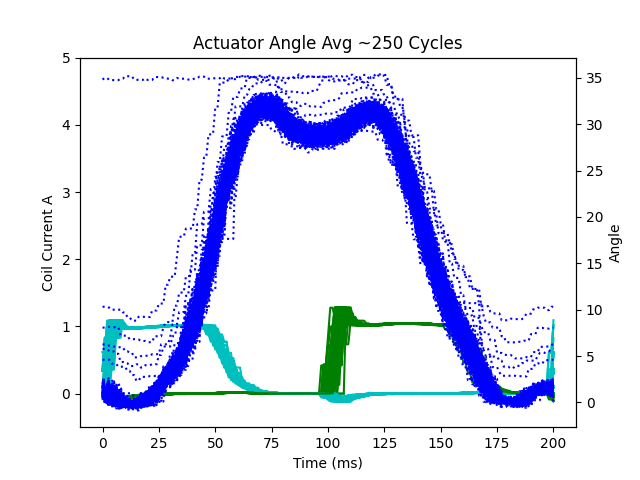

In [150]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

xaxis = np.round(np.linspace(0,200, 200))
#print(xaxis)
ax1.set_ylim([-0.5, 5])
plt.title("Actuator Angle Avg ~250 Cycles")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Coil Current A")
ax2.set_ylabel("Angle")
for i in range(1, len(df['iCVD1Cmd_ma'])-window):
    if df['iCVD1Cmd_ma'][i-1] == 0  and df['iCVD1Cmd_ma'][i] > 0:
        #ax1.plot(xaxis, df['iCVD1Cmd_ma'][i:i+200], 'r')
        #ax1.plot(xaxis, df['iCVD2Cmd_ma'][i:i+200], 'b')
        ax1.plot(xaxis, scaled_CVD1[i:i+200], 'c')
        ax1.plot(xaxis, scaled_CVD2[i:i+200], 'g')

        ax2.plot(xaxis, df['aActuator_deg_axio'][i:i+200], 'b:')

<IPython.core.display.Javascript object>


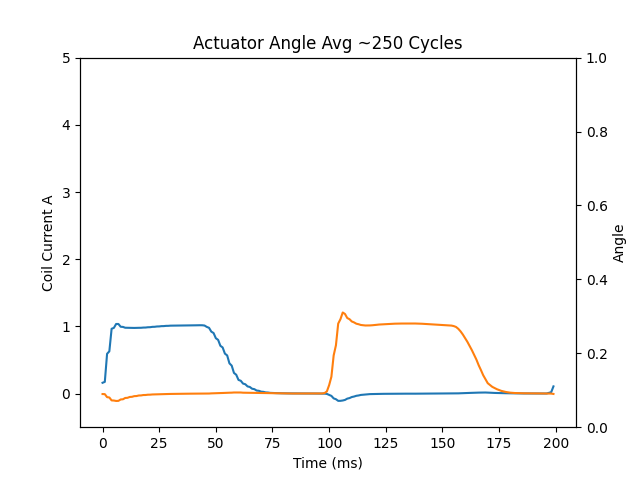

In [149]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
allCVD1 = []
allCVD2 = []

xaxis = np.round(np.linspace(0,200, 200))
ax1.set_ylim([-0.5, 5])
plt.title("Actuator Angle Avg ~250 Cycles")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Coil Current A")
ax2.set_ylabel("Angle")
for i in range(1, len(df['iCVD1Cmd_ma'])-window):
    if df['iCVD1Cmd_ma'][i-1] == 0  and df['iCVD1Cmd_ma'][i] > 0:

        allCVD1.append(scaled_CVD1[i:i+200])
        allCVD2.append(scaled_CVD2[i:i+200])

ax1.plot((np.average(allCVD1, axis = 0)))
ax1.plot((np.average(allCVD2, axis = 0)))

In [143]:
data = np.array([[1, 2, 3], [5, 6, 7]])
np.average(data, axis=0)

array([3., 4., 5.])